## <b/> Importing Libraries

In [17]:
import numpy as np               # For numerical computations
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs

from sklearn.cluster import KMeans   # For KMeans clustering
from sklearn.cluster import DBSCAN   # For DBSCAN clustering

## <b/> Load the Dataset

In [18]:
# Read the CSV file 'Mall_Customers.csv' into a pandas DataFrame
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# Check the shape of the DataFrame 'data'
data.shape

(200, 5)

In [20]:
# Extract columns 3 and 4 from the DataFrame 'data' and convert them into a NumPy array
df = data.iloc[:, [3, 4]].values

# Display the resulting NumPy array
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

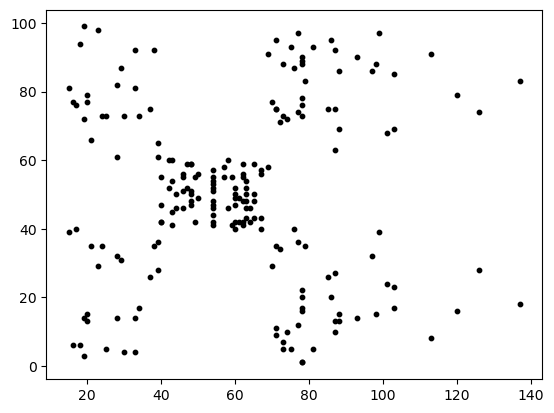

In [21]:
# Create a scatter plot of the data points
plt.scatter(df[:, 0], df[:, 1], s=10, c='black')

# Display the plot
plt.show()

## <b/> Using Elbow Method for finding Optimal Clusters

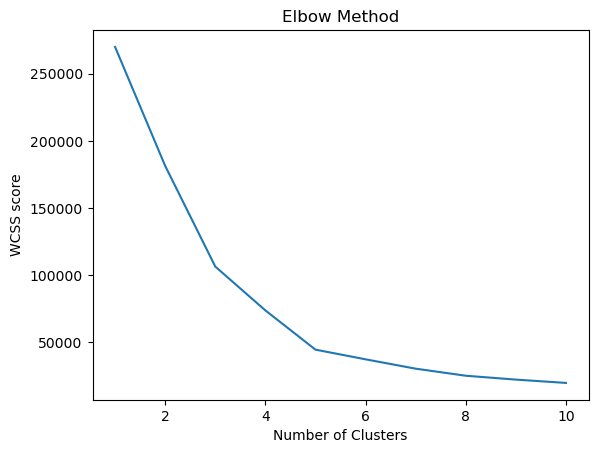

In [22]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS) scores
wcss = []

# Iterate over a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Initialize KMeans clustering with the current number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    
    # Fit KMeans to the data and compute the WCSS score
    kmeans.fit(df)
    
    # Append the WCSS score to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS scores
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS score')
plt.show()

## <b/> DBSCAN Clustering

In [23]:
# Initialize DBSCAN clustering algorithm with specified parameters
dbscan = DBSCAN(eps=5, min_samples=5)

In [24]:
# Fit the DataFrame to DBSCAN Model
labels = dbscan.fit_predict(df)

In [26]:
# Calculate the unique cluster labels
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

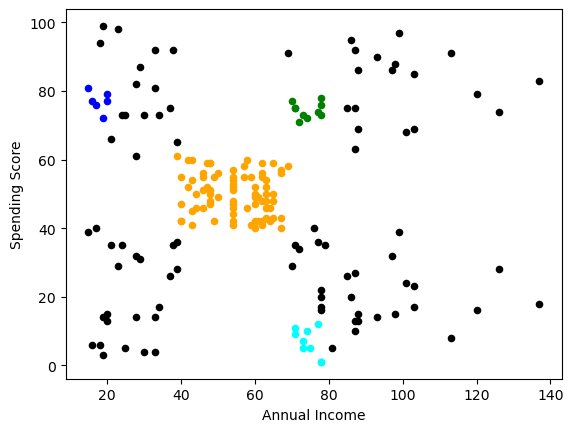

In [27]:
# Scatter plot for points classified as noise (label = -1)
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s=20, c='black')

# Scatter plot for points in cluster 0
plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s=20, c='blue')

# Scatter plot for points in cluster 1
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s=20, c='orange')

# Scatter plot for points in cluster 2
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s=20, c='green')

# Scatter plot for points in cluster 3
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s=20, c='cyan')

# Set the labels for x and y axes
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Display the plot
plt.show()

- DBSCAN clusters the data points which are dense or close to each other.

------